In [35]:
"""
Exp01: MA Window Robustness Sweep

Goal:
- Test whether MA-based trend signal exhibits a stable performance plateau
  across window choices, rather than parameter-specific overfitting.

Fixed:
- Asset: SPY
- Execution: next-bar
- Risk: none (baseline)

Sweep:
- MA_WINDOW
"""

'\nExp01: MA Window Robustness Sweep\n\nGoal:\n- Test whether MA-based trend signal exhibits a stable performance plateau\n  across window choices, rather than parameter-specific overfitting.\n\nFixed:\n- Asset: SPY\n- Execution: next-bar\n- Risk: none (baseline)\n\nSweep:\n- MA_WINDOW\n'

In [36]:
# import os
# os.chdir("..")
# print(os.getcwd())

import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [37]:
import pandas as pd

from config import Config
from runner import run

In [38]:
from config import Config
cfg = Config()   # baseline config

# from dataclasses import replace
# cfg = replace(
#     Config(),
#     COST_RATE = 0.0
# )

print(cfg)

Config(DATA_PATH='data/raw/SPY_2015_2025.csv', PRICE_COL='Close', MA_WINDOW=20, LONG_ONLY=True, COST_RATE=0.001, START=None, END=None)


NB：
cfg_w = deepcopy(cfg)
cfg_w.MA_WINDOW = 5
### will raise error, cause: config, @dataclass(frozen=True)
### 👉 frozen dataclass => cannot change, ensure: baseline config won't be poluuted

from dataclasses import replace
from config import Config

cfg = Config()  # baseline
cfg_w = replace(cfg, MA_WINDOW=5)

print(cfg.MA_WINDOW)    # 20
print(cfg_w.MA_WINDOW)  # 5

✅ Advantages：
do not break immutability
explicitly show: 「new experimental config」
recommend to use in: sweep / experiments

In [39]:
# MA window Sweep
from copy import deepcopy
from dataclasses import replace
from config import Config

windows = [5, 10, 15, 20, 30, 50, 80, 100,120,150]
rows = []

for w in windows:
    cfg_w = deepcopy(cfg)
    cfg_w = replace(cfg, MA_WINDOW=w)
    
    _, summary = run(cfg_w)
    summary["MA_WINDOW"] = w # dict
    rows.append(summary)

exp01 = pd.DataFrame(rows).sort_values("MA_WINDOW") # 汇总成一个 实验结果表（experiment table）,按MA_WINDOW排序(不排序的话，plot“来回跳”，像noise)

exp01


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,MA_WINDOW
0,-0.036452,-0.406181,-0.292160,687.0,2511,5
1,0.040125,-0.235232,0.422873,426.0,2506,10
2,0.038848,-0.210559,0.413200,321.0,2501,15
3,0.045920,-0.242279,0.486867,264.0,2496,20
4,0.046048,-0.188682,0.487968,231.0,2486,30
5,0.041524,-0.223732,0.437401,177.0,2466,50
6,0.069690,-0.192385,0.663331,108.0,2436,80
7,0.074117,-0.196409,0.692780,100.0,2416,100
8,0.069070,-0.216640,0.639455,98.0,2396,120
9,0.081462,-0.225484,0.721006,72.0,2366,150


<Axes: title={'center': 'Exp01 | Sharpe vs MA Window'}, xlabel='MA_WINDOW'>

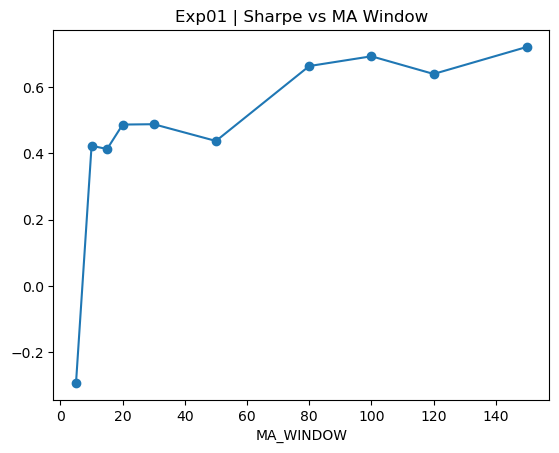

In [40]:
exp01.set_index("MA_WINDOW")["Sharpe"].plot(
    marker="o", title="Exp01 | Sharpe vs MA Window"
)
# .set_index("MA_WINDOW")：把 MA_WINDOW 这一列 设为横轴（index）
# ["Sharpe"]： 只选取 Sharpe 这一列

<Axes: title={'center': 'Exp01 | Annual Return vs MA Window'}, xlabel='MA_WINDOW'>

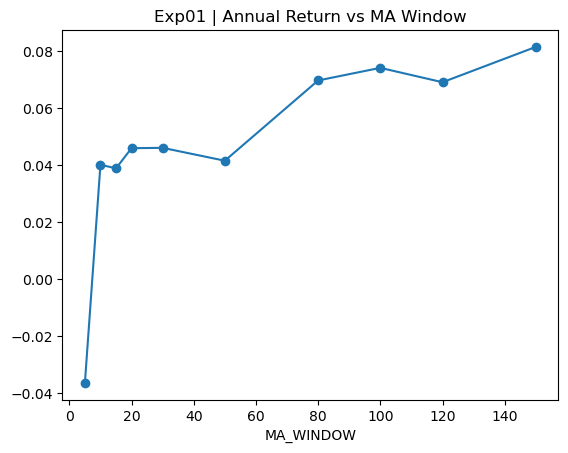

In [41]:
exp01.set_index("MA_WINDOW")["Annual Return"].plot(
    marker="o", title="Exp01 | Annual Return vs MA Window"
)

<Axes: title={'center': 'Exp01 | Turnover vs MA Window'}, xlabel='MA_WINDOW'>

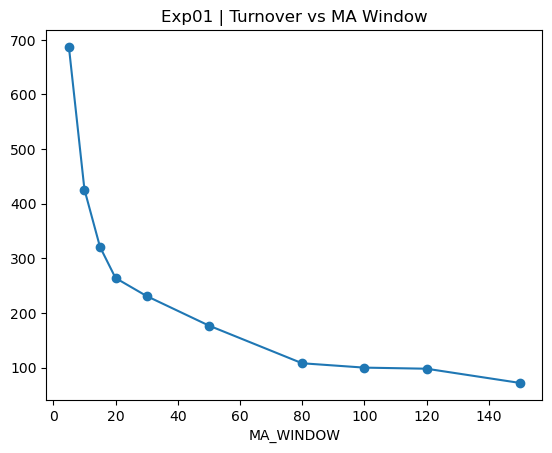

In [42]:
exp01.set_index("MA_WINDOW")["Total Turnover"].plot(
    marker="o", title="Exp01 | Turnover vs MA Window"
)

array([<Axes: xlabel='MA_WINDOW'>, <Axes: xlabel='MA_WINDOW'>],
      dtype=object)

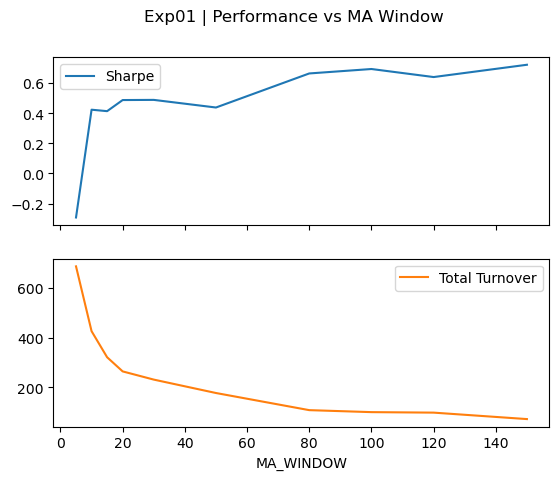

In [43]:
exp01.set_index("MA_WINDOW")[["Sharpe","Total Turnover"]].plot(
    subplots=True, title="Exp01 | Performance vs MA Window"
)

### Observations
- MA windows <20: exhibit high turnover and unstable performance, indicating noise-driven overtrading.
- MA windows [50, 100]: A broad performance plateau is observed, with stable Sharpe ratios and significantly reduced turnover.
- MA windows >120: delayed reaction and lower returns.

### Conclusion
The MA signal demonstrates structural stability under moderate parameter perturbations,
suggesting that performance is not driven by parameter-specific overfitting.